## **Creating Model**

In [31]:
import pandas as pd
import os 
import glob as gb
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Dropout, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import decode_predictions
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D

In [45]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [46]:
TRAIN_DIR = 'data/train'
VALID_DIR = 'data/val'
TEST_DIR = 'data/test'
BATCH_SIZE=64
IMAGE_SIZE = 256

In [47]:
for folder in os.listdir(TRAIN_DIR):
    files = gb.glob(pathname = str(TRAIN_DIR+'/'+folder+'/*'))
    print(f'Training Data: found {len(files)} in folder {folder}')

Training Data: found 1613 in folder catract
Training Data: found 3212 in folder normal


In [48]:
for folder in os.listdir(VALID_DIR):
    files = gb.glob(pathname = str(VALID_DIR+'/'+folder+'/*'))
    print(f'Training Data: found {len(files)} in folder {folder}')

Training Data: found 102 in folder catract
Training Data: found 216 in folder normal


In [49]:
for folder in os.listdir(TEST_DIR):
    files = gb.glob(pathname = str(TEST_DIR+'/'+folder+'/*'))
    print(f'Training Data: found {len(files)} in folder {folder}')

Training Data: found 21 in folder catract
Training Data: found 44 in folder normal


In [54]:
class_name = ['normal', 'catract' ]

### Prepare the data for Training

In [52]:
train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(TRAIN_DIR,
                                                 target_size = (IMAGE_SIZE, IMAGE_SIZE),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(VALID_DIR,
                                            target_size = (IMAGE_SIZE, IMAGE_SIZE),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical')

Found 4825 images belonging to 2 classes.
Found 318 images belonging to 2 classes.


## Building Model

In [25]:
# Initialise
classifier = Sequential()

#Convolution
classifier.add(Conv2D(16, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

#Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.1))

#Second conv layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))

#Flattening
classifier.add(Flatten())

#Adding Dense layer
classifier.add(Dense(units = 128,kernel_regularizer=keras.regularizers.l2(0.001), activation = 'relu'))
classifier.add(Dropout(0.5))

classifier.add(Dense(units = 4, activation = 'softmax'))

# Compiling
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [26]:

classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 63, 63, 16)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 30, 30, 32)       

In [27]:
history = classifier.fit(training_set,
                         epochs = 5,
                         validation_data = test_set)


Epoch 1/5
139/139 [==============================] - 484s 3s/step - loss: 1.4014 - accuracy: 0.4621 - val_loss: 1.3057 - val_accuracy: 0.4202
Epoch 2/5
139/139 [==============================] - 487s 4s/step - loss: 1.1961 - accuracy: 0.5039 - val_loss: 1.2579 - val_accuracy: 0.4604
Epoch 3/5
139/139 [==============================] - 486s 4s/step - loss: 1.1533 - accuracy: 0.5328 - val_loss: 1.2260 - val_accuracy: 0.4718
Epoch 4/5
139/139 [==============================] - 486s 3s/step - loss: 1.1284 - accuracy: 0.5439 - val_loss: 1.2055 - val_accuracy: 0.4685
Epoch 5/5
139/139 [==============================] - 484s 3s/step - loss: 1.1081 - accuracy: 0.5502 - val_loss: 1.1999 - val_accuracy: 0.4896


### Saving Model

In [28]:
classifier.save('model1.h5')  # creates a HDF5 file 

### Evaluate Model

In [29]:
classifier.evaluate(test_set)

49/49 [==============================] - 109s 2s/step - loss: 1.1999 - accuracy: 0.4896


[1.1999223232269287, 0.48962387442588806]

Text(0, 0.5, 'Loss')

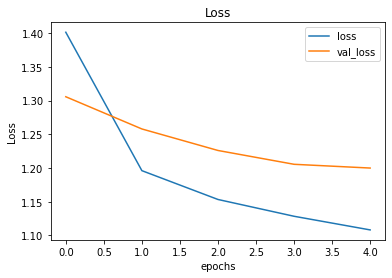

In [30]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

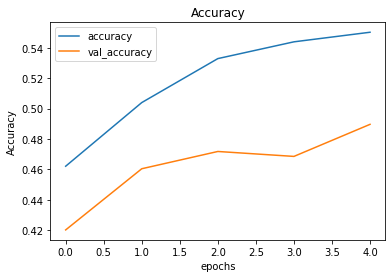

In [31]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')

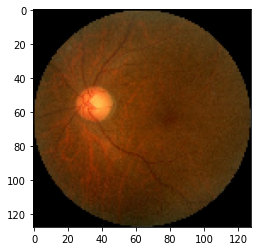

0

In [36]:
model_path = "model1.h5"
loaded_model = keras.models.load_model(model_path)

img_dir1 = r'data\test\cataract\2218_left.jpg'
img = image.load_img(img_dir1 , target_size=(128, 128))
plt.imshow(img)
plt.show()

X = image.img_to_array(img)
X = np.expand_dims(X, axis=0)
images = np.vstack([X])
pred = loaded_model.predict(images)
result = pred.argmax()
result

In [55]:
training_set.class_indices

{'catract': 0, 'normal': 1}

In [56]:
shape = (IMAGE_SIZE,IMAGE_SIZE,3)

base_model = Xception(weights='imagenet', include_top=False, input_shape=shape)

base_model.trainable = False

inputs = keras.Input(shape=shape)

xtractor = base_model(inputs, training = False)
# xtractor = keras.layers.GlobalAveragePooling2D()(xtractor)
# xtractor = keras.layers.Flatten()(xtractor)
# xtractor = keras.layers.GlobalAveragePooling2D()(xtractor)
cnn = Conv2D(16, (2, 2), activation = 'Mish')(xtractor)
cnn = MaxPooling2D(pool_size = (2, 2))(cnn)
cnn = Conv2D(16, (2, 2), activation = 'Mish')(cnn)
cnn = MaxPooling2D(pool_size = (2, 2))(cnn)
cnn = Flatten()(cnn)
outputs = Dense(units = 2, activation = 'softmax')(cnn)

model = keras.Model(inputs, outputs)
# cnn = Sequential()
# cnn.add(xtractor)
# cnn.add(Conv2D(16, (3, 3), input_shape = shape, activation = 'mish'))
# cnn.add(MaxPooling2D(pool_size = (2, 2)))
# cnn.add(Conv2D(32, (3, 3), input_shape = shape, activation = 'mish'))
# cnn.add(MaxPooling2D(pool_size = (2, 2)))
# cnn.add(Dense(units = 2, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.summary()


Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_75 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 conv2d_195 (Conv2D)         (None, 7, 7, 16)          131088    
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 3, 3, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_196 (Conv2D)         (None, 2, 2, 16)          1040      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 1, 1, 16)         0         
 g2D)                                                     

In [57]:
history = model.fit(training_set,
                         epochs = 10,
                         validation_data = test_set)

Epoch 1/10
 6/76 [=>............................] - ETA: 7:39 - loss: 0.6148 - accuracy: 0.7057

KeyboardInterrupt: 